<div style="font-size:28pt; line-height:25pt, font-weight:bold; text-align:center;"> Deep Learning in Julia with Flux.jl </div>

<br/><br/>
In this notebook, we'll learn about the [Flux](https://github.com/FluxML/Flux.jl) Deep Learning framework for Julia.
In short, it is a Julia library which cleverly exploits the specificities of the Julia language to allow for an extremely efficient and user-friendly implementation of Deep Learning algorithms. <br></br>  


#### Table Of Contents :
0. [Prerequisites](#sec0)
1. [Quick Introduction to Julia](#sec1)
2. [What is Flux.jl ?](#sec2)
3. [Simple Example : Multilayer Perceptron](#sec3)
4. [Convolutional Neural Network in Flux](#sec4)
5. [Going Further](#sec5)
6. [References](#biblio)

# 0.<a id="sec0"></a> Prerequisites

Before getting started, you'll have to install Julia and the IJulia Jupyter Kernel on your local machine through these links : 
- [Julia download](https://julialang.org/downloads/)
- [IJulia](https://github.com/JuliaLang/IJulia.jl)

Alternatively, it is also possible to run this notebook on Colab, which might be helpful if you want to use the GPU (the GPU is not an absolute necessity for this notebook, most of the code will run in acceptable time without). You'll have to add this [Colab template](https://colab.research.google.com/github/ageron/julia_notebooks/blob/master/Julia_Colab_Notebook_Template.ipynb) taken from [this Github repository](https://github.com/ageron/julia_notebooks) at the beginning of the notebook, which will install the Julia kernel for a single Colab instance.
<br></br>

Now that we have Julia installed (if you just installed it, you'll have to reopen this notebook with the Julia kernel), we'll need to install some additional packages. This is all done in the next cell.

In [5]:
#You can go get yourself a snack, this will take a while
using Pkg
Pkg.add("Flux")
Pkg.add("Statistics")
Pkg.add("Parameters")
Pkg.add("MLDatasets")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("Gadfly")
Pkg.add("LinearAlgebra")
Pkg.add("Random")
Pkg.add("PyCall")
Pkg.add("CUDA")
Pkg.add("EDF")
Pkg.add("BSON")

  Resolving package versions...
No Changes to `C:\Users\Nathanael\.julia\environments\v1.5\Project.toml`
No Changes to `C:\Users\Nathanael\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
Updating `C:\Users\Nathanael\.julia\environments\v1.5\Project.toml`
  [10745b16] + Statistics
No Changes to `C:\Users\Nathanael\.julia\environments\v1.5\Manifest.toml`
  Resolving package versions...
  Installed Parameters ─ v0.12.1
Updating `C:\Users\Nathanael\.julia\environments\v1.5\Project.toml`
  [d96e819e] + Parameters v0.12.1
Updating `C:\Users\Nathanael\.julia\environments\v1.5\Manifest.toml`
  [d96e819e] + Parameters v0.12.1
  Resolving package versions...
  Installed IniFile ───────── v0.5.0
  Installed LibCURL_jll ───── v7.70.0+2
  Installed HDF5_jll ──────── v1.12.0+1
  Installed Lz4_jll ───────── v1.9.2+2
  Installed URIParser ─────── v0.4.1
  Installed GZip ──────────── v0.5.1
  Installed BufferedStreams ─ v1.0.0
  Installed MLDatasets ────── v0.5.3
  Installed Zst

   Building GR → `C:\Users\Nathanael\.julia\packages\GR\cRdXQ\deps\build.log`
  Resolving package versions...
  Installed IntelOpenMP_jll ────────────── v2018.0.3+0
  Installed Xorg_xcb_util_jll ──────────── v0.4.0+1
  Installed Xorg_libXcursor_jll ────────── v1.2.0+4
  Installed Xorg_xcb_util_keysyms_jll ──── v0.4.0+1
  Installed Xorg_xcb_util_image_jll ────── v0.4.0+1
  Installed Rmath ──────────────────────── v0.6.1
  Installed Distributions ──────────────── v0.23.12
  Installed Gadfly ─────────────────────── v1.3.1
  Installed Xorg_xkbcomp_jll ───────────── v1.4.2+4
  Installed Loess ──────────────────────── v0.5.3
  Installed Xorg_libxcb_jll ────────────── v1.13.0+3
  Installed ArrayLayouts ───────────────── v0.4.11
  Installed FillArrays ─────────────────── v0.9.7
  Installed Libglvnd_jll ───────────────── v1.3.0+3
  Installed Libmount_jll ───────────────── v2.34.0+3
  Installed MKL_jll ────────────────────── v2020.2.254+0
  Installed Hexagons ───────────────────── v0.2.0
  Insta

  [0c0b7dd1] + Xorg_libXau_jll v1.0.9+4
  [935fb764] + Xorg_libXcursor_jll v1.2.0+4
  [a3789734] + Xorg_libXdmcp_jll v1.1.3+4
  [1082639a] + Xorg_libXext_jll v1.3.4+4
  [d091e8ba] + Xorg_libXfixes_jll v5.0.3+4
  [a51aa0fd] + Xorg_libXi_jll v1.7.10+4
  [d1454406] + Xorg_libXinerama_jll v1.1.4+4
  [ec84b674] + Xorg_libXrandr_jll v1.5.2+4
  [ea2f1a96] + Xorg_libXrender_jll v0.9.10+4
  [14d82f49] + Xorg_libpthread_stubs_jll v0.1.0+3
  [c7cfdc94] + Xorg_libxcb_jll v1.13.0+3
  [cc61e674] + Xorg_libxkbfile_jll v1.1.0+4
  [12413925] + Xorg_xcb_util_image_jll v0.4.0+1
  [2def613f] + Xorg_xcb_util_jll v0.4.0+1
  [975044d2] + Xorg_xcb_util_keysyms_jll v0.4.0+1
  [0d47668e] + Xorg_xcb_util_renderutil_jll v0.3.9+1
  [c22f9ab0] + Xorg_xcb_util_wm_jll v0.4.1+1
  [35661453] + Xorg_xkbcomp_jll v1.4.2+4
  [33bec58e] + Xorg_xkeyboard_config_jll v2.27.0+4
  [c5fb5394] + Xorg_xtrans_jll v1.4.0+3
  [b53b4c65] + libpng_jll v1.6.37+6
  [d8fb68d0] + xkbcommon_jll v0.9.1+5
  [4607b0f0] + SuiteSparse
   Building

# 1.<a id="sec1"></a> Quick Introduction to Julia
<img src="1280px-Julia_Programming_Language_Logo.svg.png" width="200px">

<br></br>
From [Wikipedia](https://en.wikipedia.org/wiki/Julia_(programming_language))
>Julia is a high-level, high-performance, dynamic programming language. While it is a general-purpose language and can be used to write any application, many of its features are well suited for numerical analysis and computational science.

One of the key advantages of Julia is that, while being a high-level dynamic language like Python, it has performance [comparable to static languages such as C or Fortran](https://julialang.org/benchmarks/).  
It achieves such performance by compiling code ["just-in-time" (JIT)](https://en.wikipedia.org/wiki/Just-in-time_compilation) and using ["multiple-dispatch"](https://en.wikipedia.org/wiki/Multiple_dispatch) : practically speaking, it means that when the code is compiled, Julia looks through all the parameters types to compute the most optimal version of the code. Interested readers may refer to [[1]](https://arxiv.org/pdf/1411.1607.pdf) or [[2]](https://ucidatascienceinitiative.github.io/IntroToJulia/Html/WhyJulia) for further understanding. 
So Julia allows you to write easily understandable code while giving you performances comparable to C. It is also worth noting that Julia offers a good support of parallelism and has a very math-friendly syntax. Pretty neat, right ?
<br></br> <br></br>
To be able to read this notebook, you'll have to be familiar with Julia and its syntax. Some very good resources to get started are on [the official page](https://julialang.org/learning/tutorials/). If you are familiar with Python, the [Julia for Pythonistas](https://github.com/ageron/julia_notebooks) notebook is also an excellent way to get started.  
Finally, here is a comprehensive [Julia cheat-sheet](https://juliadocs.github.io/Julia-Cheat-Sheet/) which can be a good reference for syntax and basic functionalities of the language. <br></br>

From now on, I'll assume that you are at least a minimum Julia-literate, so please make sure you are !

As a short introduction, let's implement some basic functions in Julia and compare how they are implemented and perform relative to their Python counterpart.  <br></br>
### 1. Factorial
First, we'll implement the factorial of an integer $n$ defined by : $n! = n \times (n-1) \times \ldots \times 1$

In [12]:
#in Julia
function recursive_factorial(n)
    if n<1
        fact = 1
    else
        fact = n*recursive_factorial(n-1)
    end
    fact
end

#alternative code with ternary conditional operator
tco_factorial(n) = n < 1 ? 1 : n * tco_factorial(n - 1)

tco_factorial (generic function with 1 method)

In [17]:
@time recursive_factorial(BigInt(100))

  0.003262 seconds (1.11 k allocations: 19.680 KiB)


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [18]:
@time tco_factorial(BigInt(100))

  0.000077 seconds (1.11 k allocations: 19.680 KiB)


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

In [22]:
@time factorial(BigInt(100))

  0.000509 seconds (7 allocations: 144 bytes)


93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000

Now let's write and time the equivalent Python code :

In [21]:
#in Python
using PyCall

py"""
def py_recursive_fac(n):
    return 1 if n==1 else n*py_recursive_fac(n-1)

from math import factorial
from timeit import default_timer as timer

start = timer()
result = py_recursive_fac(100)
end = timer()
print("elapsed time for self-coded factorial (in seconds) :", end - start, "result is ", result)

start = timer()
result = factorial(100)
end = timer()
print("elapsed time for math library factorial (in seconds) :", end - start, "result is ", result)
"""

elapsed time for self-coded factorial : 7.049999999253487e-05 result is  93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000
elapsed time for math library factorial : 7.800000020097286e-06 result is  93326215443944152681699238856266700490715968264381621468592963895217599993229915608941463976156518286253697920827223758251185210916864000000000000000000000000


This was an introductory example of the syntax differences between Python and Julia, but so far there doesn't seem to be any performance gain in favor of Julia... Let's try something else :  <br></br>

### 2. A Monte-Carlo approximation of $\pi$

The idea of the Monte-Carlo approximation of pi is to estimate the area of a circle of radius $r = 1/2$ (arbitrary) by sampling bivariate uniforms in the unit square $[0,1] \times [0,1] $ and looking at the fraction that fall into the circle.   
This approach is valid by virtue of the [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers) which guarantees that the average number of points that fall in the circle converges to its area.  
If we can estimate the area of the unit circle, then dividing it by $r^2=(1/2)^2=1/4$ gives an estimate of $\pi$.

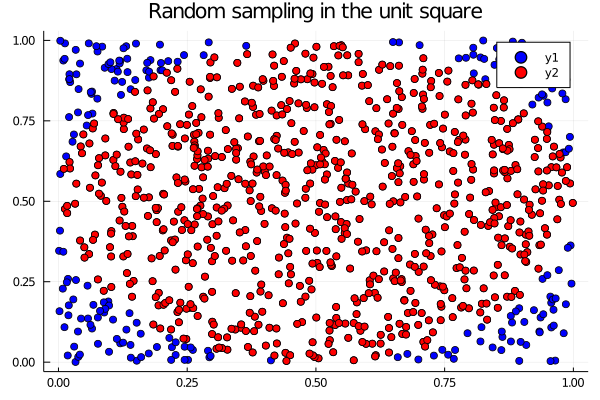

In [36]:
#an illustrative plot
using Plots
using Random

#random uniform sampling
X=zeros(Float64,1000);
Y=zeros(Float64,1000);
rand!(X);
rand!(Y);

#check if in circle or not
R2=(X .- .5).^2+(Y .- .5).^2;

#list of points that are in the circle
Xc=[];
Yc=[]
for ii in 1:length(X)
    if R2[ii]<.25
        push!(Xc,X[ii]);
        push!(Yc,Y[ii]);
    end
end

scatter(X,Y, color="blue")
scatter!(Xc,Yc,color="red", title = "Random sampling in the unit square" )

In [38]:
#in Julia

n = 100_000

function pi_estimate(n=n)
    a = rand(n)
    b = rand(n)

    count = 0

    for i = 1:n
      if (a[i] - .5)^2 + (b[i] - .5)^2 <= .25
        count = count + 1
      end
    end
    count/n*4
end

@time pi_estimate(n)

  0.020052 seconds (19.38 k allocations: 2.563 MiB)


3.14292

In [40]:
#in Python
using PyCall

py"""
import numpy as np
from timeit import default_timer as timer

n = 100_000

def pi_estimate(n=n):
    x = np.random.random(size=n) - 0.5
    y = np.random.random(size=n) - 0.5
    z = (x**2+y**2)< 0.25
    return 4*z.sum()/n

start = timer()
pi_est = pi_estimate(n)
end = timer()
print("elapsed time (in seconds) :", end - start, "approximated pi is ", pi_est)
"""

elapsed time (in seconds) : 0.007637700000032055 approximated pi is  3.1394


Ok, now we've had a brief look at how the arrays, plots and random library can be used in Julia, but we have yet to see a performance gain with respect to Python. Let's take a look at a final example :  

### 3. Mandelbrot Set Generation

The [Mandelbrot Set](https://en.wikipedia.org/wiki/Mandelbrot_set) is defined by the set of complex numbers $a$ such that the sequence defined by  
$$ z_0 = 0, \qquad z_{n+1} = z_n^2 + a$$
remains bounded.
The generation of Mandelbrot set is a [common benchmark](https://rosettacode.org/wiki/Mandelbrot_set) for testing programming languages' speed. Let's compare the implementations and speeds respectively in Julia and Python.

In [49]:
#this code generates an ASCII representation of the Mandelbrot set
#source : rosettacode.org
function mandelbrot(a)
    z = 0
    for i=1:50
        z = z^2 + a
    end
    return z
end
 
@time begin 
    for y=1.0:-0.05:-1.0
    for x=-2.0:0.0315:0.5
        abs(mandelbrot(complex(x, y))) < 2 ? print("*") : print(" ")
    end
    println()
end
end

                                                                                
                                                                                
                                                                                
                                                           **                   
                                                         ******                 
                                                       ********                 
                                                         ******                 
                                                      ******** **   *           
                                              ***   *****************           
                                              ************************  ***     
                                              ****************************      
                                           ******************************       
                            

In [47]:
#same thing in Python
#source : rosettacode.org
using PyCall

py"""
import math
from timeit import default_timer as timer 

start = timer()

 
def mandelbrot(z , c , n=40):
    if abs(z) > 1000:
        return float("nan")
    elif n > 0:
        return mandelbrot(z ** 2 + c, c, n - 1) 
    else:
        return z ** 2 + c

end = timer()

print("\n".join(["".join(["#" if not math.isnan(mandelbrot(0, x + 1j * y).real) else " "
                 for x in [a * 0.02 for a in range(-80, 30)]]) 
                 for y in [a * 0.05 for a in range(-20, 20)]])
     )

print("elapsed time (in seconds) :", end - start) 
"""

                                                                                #                             
                                                                                                              
                                                                                                              
                                                                       #  ##                                  
                                                                     ###########                              
                                                                    ############                              
                                                                     ##########                               
                                                            ##   # ############  # #   #                      
                                                    ###### # ########################### #                    
 

Now that we've seen some use cases of Julia to solve some real problems, and that we have gotten more familiar with its syntax and specificities, it is time to move on to the main part : the Flux library.   <br></br>

But first, there is a point to address : from our results, it seems like there is no performance gain with respect to Python when using Julia. While it is indeed what we have observed, there are at least two reasons for this : the first (and obvious) one is that, as a Julia beginner, my code is most likely very suboptimal (See e.g.. [this code](https://github.com/JuliaLang/Microbenchmarks/blob/master/perf.jl) to see how optimized Julia code looks like). The second point is that the above tests are **not** benchmarking tests and should not be seen as so. Refer to [this page](https://rbspy.github.io/benchmarking-your-code/) to see actual benchmarking practices.  

So, if you're not convinced about the performance claims, I vividly encourage you to run the above code through a proper benchmark, and to check the results for yourself.  <br></br>  

With all that being said, if you don't see the appeal of Julia so far - which would be totally undersantandable, I hope that Flux, which is a perfect example of an optimal use of Julia properties, will change your opinion.

# 2.<a id="sec2"></a> What is Flux.jl ?

<img src="flux_logo.png" width="200px">

Now that we've gotten to know Julia better. Let's get into the heart of the matter : the Flux library. From the [documentation](https://fluxml.ai/Flux.jl/stable/) :  

>Flux is a library for machine learning. It comes "batteries-included" with many useful tools built in, but also lets you use the full power of the Julia language where you need it. We follow a few key principles: [being easy to use, easy to learn and easy to implement]"  

Flux is a powerful library for Deep Learning, comparable to PyTorch in Python. As written in the original paper ([[3]](https://arxiv.org/pdf/1811.01457.pdf), [[5]](https://www.theoj.org/joss-papers/joss.00602/10.21105.joss.00602.pdf)), its main features are its simplicity, its hackability (meaning that one can easily modify parts of the original code to fit their purpose), its use of compiler technology, and last but not least, its [Algorithmic Differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) tool, which allows to compute gradients in a very efficient way, combining the best of both the static and dynamic graphs approaches of respectively [Tensorflow](https://www.tensorflow.org/guide/autodiff) and [PyTorch](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html). <br></br>

If you're interested, you can read more about the Automatic Differentiation tool [Zygote.jl](https://github.com/FluxML/Zygote.jl) which is used in Flux and about Automatic Differentiation respectively in the following references : [[6]](https://arxiv.org/pdf/1907.07587.pdf) and [[4]](http://aero-comlab.stanford.edu/Papers/martins.aiaa.01-0921.pdf). <br></br>




### Computing Gradients with Flux

Flux's core feature is taking gradients of Julia code. The ```gradient``` function takes another Julia function f and a set of arguments, and returns the gradient with respect to each argument :

In [56]:
using Flux

f(x) = 5x^2 + sin(x) - 1
#we take the "first coordinates" of the gradients to get a scalar output
df(x) = gradient(f,x)[1] #10x + cos(x)
df2(x) = gradient(df,x)[1] #10 - sin(x)

g(x) = 3x^3 - 2x^4
dg(x) = gradient(g, x)[1] #9x^2 - 8x^3

h(x,y) = sum((x .- y).^2)
dh(x,y) = gradient(h, x, y) #if x and y are scalars : [2(x-y), 2(y-x)]

println(df(0)) #1
println(df2(pi/2)) #9
println(dg(3)) # - 135
println(dh(1,2)) #[-2, 2]


1.0
9.0
-135
(-2, 2)


Thanks to Automatic Differentiation, we can easily compute gradients of functions, cool. But in real models, there are a lot of parameters, and it would be infeasible to explicitly write them down for every gradient computation.  <br></br>

Thankfully, Flux lets us work with collection of parameters with the keyword ```params```. Here's an example of how it's used :

In [82]:
x =  [0, 2]; y = [1, 6] #change these values to make sure you understand what this code does

gs = gradient(params(x, y)) do #here we use the Do-Block syntax for function arguments, look it up
         #h is the same function as above, but now x and y are 2D vectors
         h(x, y) 
       end

println(gs[x]) #gradients with respect to x1 and x2
println(gs[y]) #gradients with respect to y1 and y2

[-2, -8]
[2, 8]


We now have an efficient way to compute gradients of complex models, great !   <br></br>

If you want to learn more about how Automatic Differentiation works, you can take a look at this [awesome GitHub repository](https://github.com/MikeInnes/diff-zoo), or at the official [Zygote.jl repo](https://github.com/FluxML/Zygote.jl). The original paper is a good reference as well : [[7]](https://arxiv.org/pdf/1810.07951.pdf). <br></br>  

For now, let's apply this powerful tool to a simple problem : linear regression. <br></br>


### Linear Regression with Flux 
We want to predict an output array ```y``` given an input array ```x```.


In [92]:
using Flux

#we initialize random weights and biases
W = rand(2, 5)
b = rand(2)

predict(x) = W*x .+ b

function loss(x, y)
  ŷ = predict(x)
  sum((y .- ŷ).^2)
end

x, y = rand(5), rand(2) # Dummy data
current_loss = loss(x, y)
println("the initial loss is ", current_loss)

#To improve the model, we'll compute the gradients of W and b with respect to the loss

gs = gradient(() -> loss(x, y), params(W, b)) #equivalent to previous cell syntax

#compute the gradients
g_W = gs[W]
g_b = gs[b]

#update the parameters
W .-= 0.1 .* g_W
b .-= 0.1 .* g_b

current_loss = loss(x, y)
println("the loss after one update is ", current_loss)

#Now, let's launch a training epoch, it can be done with the train! function

#the train! function requires the following arguments : train!(loss, params, data, opt; cb)
data = [(x,y)]
opt = Descent(0.1) #gradient descent with learning rate 0.1

using Flux.Optimise

train!(loss, params(W,b), data, opt, cb = Flux.throttle(() -> println("training"), 10))

current_loss = loss(x,y)
println("the loss after completing the training loop is ", current_loss)

the initial loss is 1.3158238614066597
the loss after one update is 0.4763797614240355
training
the loss after completing the training loop is 0.17246812719433216


Good, now that we're better acquainted with Flux, let's move on to a more interesting example : the multilayer perceptron.

# 3.<a id="sec3"></a> A simple example : Multilayer perceptron

<img src="mlp.png" width="400px">

### Building Layers

In most use cases, we would like to be able to combine linear layers like the one we just did earlier, and to add non-linearity between them. For instance, reusing the previous syntax, we would like to do something like this
```
using Flux

W1 = rand(3, 5)
b1 = rand(3)
layer1(x) = W1 * x .+ b1

W2 = rand(2, 3)
b2 = rand(2)
layer2(x) = W2 * x .+ b2

model(x) = layer2(σ.(layer1(x)))

model(rand(5)) # => 2-element vector
```

The above code works but gets needlessly long and repetitive, especially as we add more layers. To do it more efficiently, one can define a function that returns linear layers :
```
function linear(in, out)
  W = randn(out, in)
  b = randn(out)
  x -> W * x .+ b
end

linear1 = linear(5, 3) # we can access linear1.W etc
linear2 = linear(3, 2)

model(x) = linear2(σ.(linear1(x)))

model(rand(5)) # => 2-element vector
```
Or, in an equivalent manner, one can also define a struct that explicitly represents the affine layer :
```
struct Affine
  W
  b
end

Affine(in::Integer, out::Integer) =
  Affine(randn(out, in), randn(out))

# Overload call, so the object can be used as a function
(m::Affine)(x) = m.W * x .+ m.b

a = Affine(10, 5)

a(rand(10)) # => 5-element vector
```
Actually, both of the above definitions correspond  to the definition of a ``` Dense``` layer (the ``` Dense``` layer also requires to define the activation function, to be precise). Now, if you want to stack layers, the ```Chain``` function allows you to do it simply :
```
model = Chain(
  Dense(10, 5, σ),
  Dense(5, 2),
  softmax)

model(rand(10)) # => 2-element vector
```
Now let's put it all in practice !  
<br></br>



### Training a XOR model

The [XOR](https://en.wikipedia.org/wiki/Exclusive_or) (or "Exclusive OR") gate is a well-known example of a function that can't be learned by a linear model. It is defined by the following truth table :

<img src="xor_table.png" width="300px">

If we were to plot its graph in the Euclidean plane, we would get the following :
<img src="xor-graph.png" width="300px">

It is thus immediately apparent that there is no linear function that can separate these four regions. To learn it, we'll use a two layer perceptron : 

the parameters of the model are 
Params([Float32[-0.41915038 0.82640344; -0.3126357 0.3888076], Float32[0.0, 0.0], Float32[0.8991666 -0.6872647], Float32[0.0]])
0.023819182068109512
0.0028920085169374943
0.0015619790647178888
0.0010188629385083914
0.0007282667211256921
0.0005517993122339249
0.0004354185366537422
0.0003540201869327575
0.00029453105526044965
0.0002495406661182642
0.0002145675680367276
0.00018676655599847436
0.00016424842760898173
0.0001457162870792672
0.0001302583987126127
0.00011720819020411
0.00010607809235807508
9.649851563153788e-5
8.818583592073992e-5
8.092059579212219e-5
7.452873978763819e-5
6.887174095027149e-5
6.383800064213574e-5
5.933788634138182e-5
5.52948476979509e-5
5.164913454791531e-5
4.834829087485559e-5
4.534929394139908e-5
4.2615545680746436e-5
4.0115672163665295e-5
3.782339990721084e-5
3.5716177080757916e-5
3.377413668204099e-5
3.1979376217350364e-5
3.0318185963551514e-5
2.8776665203622542e-5
2.734392364800442e-5
2.6009216526290402e-5
2.476402187312487

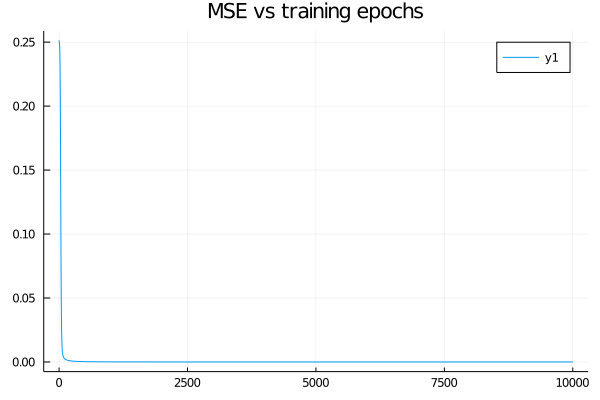

In [99]:
using Flux

## Input values for the XOR
# X = Matrix{Float32}([0 0; 0 1; 1 0; 1 1])
X = [0f0 0 1 1; 0 1 0 1] #Matrix of Float32, equivalent to Matrix{Float32}([0 0; 0 1; 1 0; 1 1])
y = [0f0 1 1 0]

## Define the XOR gated model using Chain
xornn_model = Chain(
    Dense(2, 2, sigmoid),
    Dense(2, 1, sigmoid)
)

## Check the parameters of the xornn_model
println("the parameters of the model are \n",params(xornn_model))
#println("the parameters of the first layer are \n",params(xornn_model)[1])
# println("the parameters of the final neuron are \n",params(xornn_model)[3])

## Define the loss function as the MSE 
loss_fn(x, y) = Flux.mse(xornn_model(x), y)

# Define an optimizer for the gradient descent algorithm
#opt = Descent(0.01) #performs poorly
opt = ADAM(0.1)

## Train the model
# To train the network for 1 epoch we can use the train! function.
# Here, we are training over N epochs with the above defined optimiser
N = 10000
losses = zeros(N)
for i in 1:N
    Flux.train!(loss_fn, params(xornn_model), [(X, y)], opt)
    losses[i] = loss_fn(X, y)
    if i % 50 == 0
        println(losses[i])
    end
end 


## Check of the model performance, loss should be quasi 0
println("at the end of the training, the loss is ",loss_fn(X, y))

# Check the output
println("predicted output : \n", xornn_model(X))
# Output should be close to
# Float32[0.0 1.0 1.0 0.0]


## plot of the training over time
using Plots
plot(1:N, losses)
title!("MSE vs training epochs")

Our MLP properly learned the XOR function, nice ! Now, let's move on to a more sophisticated use case : we'll use a Multi layer Perceptron to correctly identify the digits from the famous MNIST dataset. <br></br>

### MNIST digits classification
<img src="mnist.png" width="300px">  


The well-known [MNIST database](http://yann.lecun.com/exdb/mnist/) is a famous database full of handwritten digits. The task of our algorithm will be to accurately classify the digits.  
To do this, we'll use an adaptation of the MLP model from the Flux [model-zoo](https://github.com/FluxML/model-zoo).

In [106]:
using Flux, Statistics
using Flux.Data: DataLoader
using Flux: onehotbatch, onecold, logitcrossentropy, throttle, @epochs
using Base.Iterators: repeated
using Parameters: @with_kw
#Pkg.add("CUDA")
using CUDA
using MLDatasets
using BSON: @save

if has_cuda()# Check if CUDA is available
    @info "CUDA is on"
    CUDA.allowscalar(false)
end

#structure containing the global training parameters
@with_kw mutable struct Args
    η::Float64 = 3e-4       # learning rate
    batchsize::Int = 1024   # batch size
    epochs::Int = 10        # number of epochs
    device::Function = cpu  # gpu  # set as gpu, if gpu available
end

#A function to load the MNIST dataset
function getdata(args)
    ENV["DATADEPS_ALWAYS_ACCEPT"] = "true" #download process is handled by DataDeps.jl

    # Loading Dataset
    xtrain, ytrain = MLDatasets.MNIST.traindata(Float32)
    xtest, ytest = MLDatasets.MNIST.testdata(Float32)

    # Reshape Data in order to flatten each image into a linear array
    xtrain = Flux.flatten(xtrain)
    xtest = Flux.flatten(xtest)

    # One-hot-encode the labels
    ytrain, ytest = onehotbatch(ytrain, 0:9), onehotbatch(ytest, 0:9)

    # putting the data in batches with DataLoader
    train_data = DataLoader(xtrain, ytrain, batchsize=args.batchsize, shuffle=true)
    test_data = DataLoader(xtest, ytest, batchsize=args.batchsize)

    return train_data, test_data
end

#function to define the MLP model using Chain and two Dense layers
function build_model(; imgsize=(28,28,1), nclasses=10)
    return Chain(
         Dense(prod(imgsize), 32, relu),
            Dense(32, nclasses))
end

#loss function calculated across a whole batch
function loss_all(dataloader, model)
    l = 0f0 #0.0 written as a Float32
    for (x,y) in dataloader
        l += logitcrossentropy(model(x), y)
    end
    l/length(dataloader)
end

#computing the proportion of correct predictions
function accuracy(data_loader, model)
    acc = 0
    for (x,y) in data_loader
        acc += sum(onecold(cpu(model(x))) .== onecold(cpu(y)))*1 / size(x,2)
    end
    acc/length(data_loader)
end

#the main training function
function train(; kws...)
    # Initializing Model parameters 
    args = Args(; kws...)

    # Load Data
    train_data,test_data = getdata(args)

    # Construct model
    m = build_model()
    train_data = args.device.(train_data)
    test_data = args.device.(test_data)
    m = args.device(m)
    loss(x,y) = logitcrossentropy(m(x), y)
    
    ## Training
    evalcb = throttle(30) do
      @show(loss_all(train_data, m)) # Show loss
      @save "mlp-checkpoint.bson" m # saving the model after each epoch
    end
    opt = ADAM(args.η)

    #training
    @epochs args.epochs Flux.train!(loss, params(m), train_data, opt, cb = evalcb)

    #show the performance at the end of training
    @show accuracy(train_data, m)

    @show accuracy(test_data, m)
     
end

cd(@__DIR__)
train()

loss_all(train_data, m) = 2.3257253f0


┌ Info: Epoch 1
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 2
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 3
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 4
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 5
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 6
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 7
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 8
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 9
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136
┌ Info: Epoch 10
└ @ Main C:\Users\Nathanael\.julia\packages\Flux\sY3yx\src\optimise\train.jl:136


accuracy(train_data, m) = 0.9115858120539697
accuracy(test_data, m) = 0.9157924107142857


0.9157924107142857

The model has finished training and apparently, it has achieved a decent accuracy. Let's try it out :

ground truth : 4


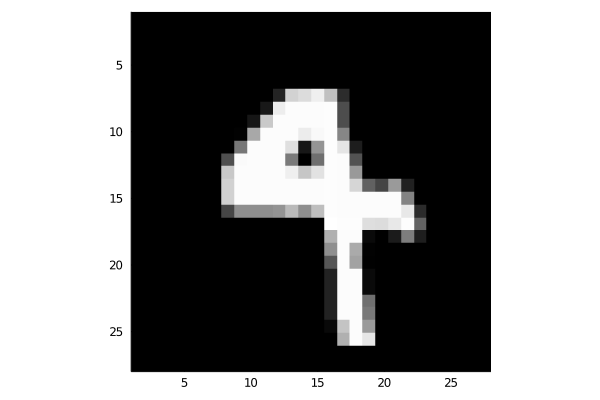

In [308]:
#relaunch the two following cells many times to test the model
using BSON: @load
@load "mlp-checkpoint.bson" m #reloading the trained model that we previously saved

#pick a random element of the MNIST database
test_sample = rand(1:10_000) 
test_x, test_y  = MLDatasets.MNIST.testdata(Float32, test_sample)
println("ground truth : ", test_y)
plot(Gray.(test_x'))

In [309]:
prediction = onecold(m(vec(test_x'))) - 1 #indexes start from 1 in Julia
println("predicted value : ", prediction)

predicted value : 4


The Multilayer Perceptron structure is starting to show its limitations, the results are indeed far from stellar. Let's move on one step further and implement a Convolutional Neural Network to realize the same task.

# 4.<a id="sec4"></a> Convolutional Neural Networks with Flux
<img src="convolution_overview.gif" width="500px">

The performance of the Multilayer Perceptron we just implemented was rather poor regarding the classification of the MNIST digits. We'll therefore implement an architecture which is more suited for this type of task : a Convolutional Neural Network. We will once again adapt a code taken from the [model-zoo](https://github.com/FluxML/model-zoo/blob/master/vision/mnist/conv.jl).

In [260]:
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, logitcrossentropy
using Base.Iterators: partition
using Printf, BSON
using Parameters: @with_kw
using CUDA
if has_cuda()
    @info "CUDA is on"
    CUDA.allowscalar(false)
end

#structure containing the global parameters
@with_kw mutable struct Argz
    lr::Float64 = 3e-3 #learning rate
    epochs::Int = 20 # number of epochs
    batch_size = 128 # size of batches
    savepath::String = "./" # relative path where the model will be saved
end

# Bundle images together with labels and group into minibatches
function make_minibatch(X, Y, idxs) #transforms grayscale images into Float32 arrays
    X_batch = Array{Float32}(undef, size(X[1])..., 1, length(idxs))
    for i in 1:length(idxs)
        X_batch[:, :, :, i] = Float32.(X[idxs[i]])
    end
    Y_batch = onehotbatch(Y[idxs], 0:9)
    return (X_batch, Y_batch)
    #X_batch is a 4 dimensional Float32 array, with the last dimension corresponding to the sample, so
    #X_batch[:, :, :, 1] is the first image. 
    #onehotbatch(Y[idxs], 0:9) encodes the labels Y[idxs] in a matrix of 1s and 0s,
    #using 0:9 as the possible class values
end

#outputs MNIST data that is ready to be fed into the neural network
function get_processed_data(args)
    # Load labels and images from Flux.Data.MNIST
    train_labels = Flux.Data.MNIST.labels()
    train_imgs = Flux.Data.MNIST.images()
    mb_idxs = partition(1:length(train_imgs), args.batch_size) #splits data in equally sized batches
    train_set = [make_minibatch(train_imgs, train_labels, i) for i in mb_idxs] 
    
    # Prepare test set as one giant minibatch:
    test_imgs = Flux.Data.MNIST.images(:test)
    test_labels = Flux.Data.MNIST.labels(:test)
    test_set = make_minibatch(test_imgs, test_labels, 1:length(test_imgs))

    return train_set, test_set
end

get_processed_data (generic function with 1 method)

Now that we have defined the necessary preprocessing functions, we will define our architecture. On top of the dense layers that you're already familiar with, we'll have [convolutional layers](https://en.wikipedia.org/wiki/Convolutional_neural_network) with [max pooling](https://wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer). <br></br>
<img src="maxpool_animation.gif" width="500px">

Although I am sure that you're already familiar with these notions, if you ever need a refresher, I recommend checking out these resources : this [excellent TDS article](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) for an intuitive and short review, and the legendary [CS231N course](https://cs231n.github.io/convolutional-networks/) for a comprehensive and thorough review.

In [271]:
# Build model
function build_model(args; imgsize = (28,28,1), nclasses = 10)
    cnn_output_size = Int.(floor.([imgsize[1]/8,imgsize[2]/8,32]))	

    return Chain(
    # First convolution, operating upon a 28x28 image
    Conv((3, 3), imgsize[3]=>16, pad=(1,1), relu),
    MaxPool((2,2)),

    # Second convolution, operating upon a 14x14 image
    Conv((3, 3), 16=>32, pad=(1,1), relu),
    MaxPool((2,2)),

    # Third convolution, operating upon a 7x7 image
    Conv((3, 3), 32=>32, pad=(1,1), relu),
    MaxPool((2,2)),

    # Reshape 3d tensor into a 2d one using `Flux.flatten`, at this point it should be (3, 3, 32, N)
    flatten,
    Dense(prod(cnn_output_size), 10))
end

# We augment `x` a little bit here, adding in random noise. 
augment(x) = x .+ gpu(0.1f0*randn(eltype(x), size(x)))

# Returns a vector of all parameters used in model
paramvec(m) = vcat(map(p->reshape(p, :), params(m))...)

# Function to check if any element is NaN or not
anynan(x) = any(isnan.(x))

accuracy(x, y, model) = mean(onecold(cpu(model(x))) .== onecold(cpu(y)))


accuracy (generic function with 2 methods)

Now that we have defined our structure and utility functions, all that's left is to define the training and to launch it :

In [272]:
function train(; kws...)
    args = Argz(; kws...)

    @info("Loading data set")
    train_set, test_set = get_processed_data(args)

    # Define our model.  We will use a simple convolutional architecture with
    # three iterations of Conv -> ReLU -> MaxPool, followed by a final Dense layer.
    @info("Building model...")
    model = build_model(args) 

    # Load model and datasets onto GPU, if enabled
    train_set = gpu.(train_set)
    test_set = gpu.(test_set)
    model = gpu(model)
    
    # Make sure our model is nicely precompiled before starting our training loop
    model(train_set[1][1])

    # `loss()` calculates the crossentropy loss between our prediction `y_hat`
    # (calculated from `model(x)`) and the ground truth `y`.  We augment the data
    # a bit, adding gaussian random noise to our image to make it more robust.
    function loss(x, y)    
        x̂ = augment(x)
        ŷ = model(x̂)
        return logitcrossentropy(ŷ, y)
    end

    # Train our model with the given training set using the ADAM optimizer and
    # printing out performance against the test set as we go.
    opt = ADAM(args.lr)

    @info("Beginning training loop...")
    best_acc = 0.0
    last_improvement = 0
    for epoch_idx in 1:args.epochs
        # Train for a single epoch
        Flux.train!(loss, params(model), train_set, opt)

        # Terminate on NaN
        if anynan(paramvec(model))
            @error "NaN params"
            break
        end

        # Calculate accuracy:
        acc = accuracy(test_set..., model)

        @info(@sprintf("[%d]: Test accuracy: %.4f", epoch_idx, acc))
        # If our accuracy is good enough, quit out.
        if acc >= 0.999
            @info(" -> Early-exiting: We reached our target accuracy of 99.9%")
            break
        end

        # If this is the best accuracy we've seen so far, save the model out
        if acc >= best_acc
            @info(" -> New best accuracy! Saving model out to mnist_conv.bson")
            BSON.@save joinpath(args.savepath, "mnist_conv.bson") paramz=cpu.(params(model)) epoch_idx acc
            best_acc = acc
            last_improvement = epoch_idx
        end

        # If we haven't seen improvement in 5 epochs, drop our learning rate:
        if epoch_idx - last_improvement >= 5 && opt.eta > 1e-6
            opt.eta /= 10.0
            @warn(" -> Haven't improved in a while, dropping learning rate to $(opt.eta)!")
   
            # After dropping learning rate, give it a few epochs to improve
            last_improvement = epoch_idx
        end

        if epoch_idx - last_improvement >= 10
            @warn(" -> We're calling this converged.")
            break
        end
    end
end

# Testing the model, from saved model
function test(; kws...)
    args = Argz(; kws...)
    
    # Loading the test data
    _,test_set = get_processed_data(args)
    
    # Re-constructing the model with random initial weights
    model = build_model(args)
    
    # Loading the saved parameters
    BSON.@load joinpath(args.savepath, "mnist_conv.bson") paramz
    
    # Loading parameters onto the model
    Flux.loadparams!(model, paramz)
    
    test_set = gpu.(test_set)
    model = gpu(model)
    @show accuracy(test_set...,model)
end

#WARNING : IF YOU DON'T HAVE ACCESS TO GPU, THIS MIGHT TAKE A LOT OF TIME
cd(@__DIR__) 
train()
test()

┌ Info: Loading data set
└ @ Main In[272]:4
┌ Info: Building model...
└ @ Main In[272]:9
┌ Info: Beginning training loop...
└ @ Main In[272]:33
┌ Info: [1]: Test accuracy: 0.9767
└ @ Main In[272]:49
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[272]:58
┌ Info: [2]: Test accuracy: 0.9856
└ @ Main In[272]:49
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[272]:58
┌ Info: [3]: Test accuracy: 0.9873
└ @ Main In[272]:49
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[272]:58
┌ Info: [4]: Test accuracy: 0.9889
└ @ Main In[272]:49
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[272]:58
┌ Info: [5]: Test accuracy: 0.9896
└ @ Main In[272]:49
┌ Info:  -> New best accuracy! Saving model out to mnist_conv.bson
└ @ Main In[272]:58
┌ Info: [6]: Test accuracy: 0.9877
└ @ Main In[272]:49
┌ Info: [7]: Test accuracy: 0.9890
└ @ Main In[272]:49
┌ Info: [8]: Test accuracy: 0.9890
└

accuracy(test_set..., model) = 0.9932


0.9932

ground truth : 9


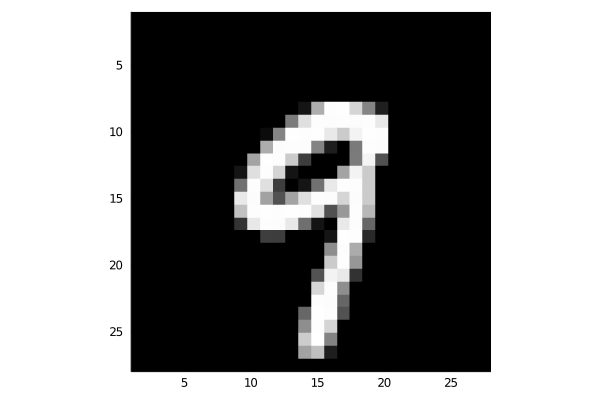

In [292]:
#relaunch the two following cells many times to test the model
using BSON: @load
#reloading the trained model
@load "mnist_conv.bson" paramz
new_model = build_model(Argz) 
Flux.loadparams!(new_model, paramz)

#pick a random element of the MNIST database
test_sample = rand(1:10_000) 
test_x, test_y  = Flux.Data.MNIST.images(:test)[test_sample], Flux.Data.MNIST.labels(:test)[test_sample]
println( "ground truth : ", test_y)
plot(Gray.(test_x))

In [293]:
x_b,y_b = make_minibatch([test_x],[test_y],[1])

prediction = onecold(new_model(x_b))[1] - 1 #indexes start from 1 in Julia
println("predicted value : ",  prediction)

predicted value : 9


Seems like our efforts paid off, the results are much better than the ones for the Multilayer Perceptron !

# 5. <a id="sec5"></a> Going Further
Even if the above examples are good use cases of Flux, there still remains a lot to be said about the possibilities offered by this wonderful library. Since this notebook is already getting long, I won't get into the details, but let's quickly discuss some of these aspects before parting ways.

### Time Series Analysis
Even if all the applications of Flux we've done were for Computer Vision, it is of course totally feasible to use it for Time Series Analysis. Let's predict the future realisations of a [Gaussian random walk](https://en.wikipedia.org/wiki/Random_walk#Gaussian_random_walk) with the realisations of two others a dummy Recurrent Neural Network. (of course, this is a dummy example)

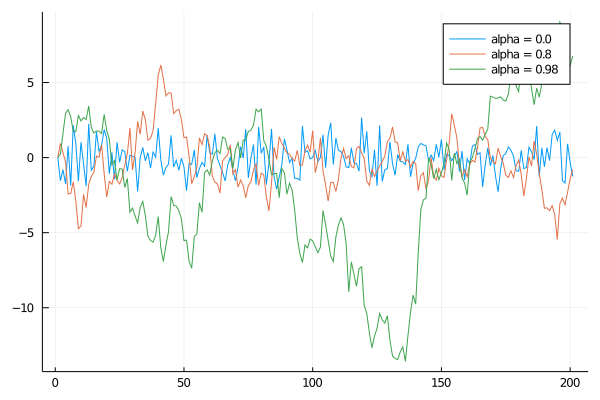

In [263]:
αs = [0.0, 0.8, 0.98] #volatilities
n = 200
x = zeros(n+1, 3)
p = plot() # naming a plot to add to

#generating three random walks
for i in 1:3
    α = αs[i]
    x[1,i] = 0.0
    for t in 1:n
        x[t+1,i] = α * x[t,i] + randn()
    end
    plot!(p, x[:,i], label = "alpha = $α", title = "three Gaussian random walks") # add to plot p
end

p # display plot p

In [265]:
#mock example, so no train_test split
x_data, y_data = x[:,1:2], x[:,3]

#Define loss function
function mseLoss(x, y)
loss = Flux.mse(model(x), y)
Flux.reset!(model)
return loss
end

#Create the model which from the two series x1 x2 predicts x3
model= Chain(
RNN(2, 20),
LSTM(20,20),
Dense(20, 1))

#Train model for one epoch
evalcb = () -> @show mseLoss.(x_data, y_data)
Flux.train!(mseLoss, params(model), zip(x_data, y_data), Flux.ADAM(0.01), cb = Flux.throttle(evalcb, 30))

mseLoss.(x_data, y_data) = [0.0019107035581856224 0.0019107035581856224; 0.12594825401774254 0.2859244789699074; 2.002645507352533 2.9630581089828723; 6.585361144678586 8.498790104155619; 11.746604371924137 7.38506207827402; 5.403944830117461 5.111166464752947; 4.828199442937263 2.0181455712873517; 3.9548556034131925 1.6278619934008218; 6.001621756108447 5.235528736681162; 7.460670219637679 3.7974975662902883; 6.758959873263104 4.8572298825868065; 4.547403638604347 4.1258165426411075; 14.911443013336015 9.235284539731722; 3.317887008135343 2.9791329293049023; 2.3382749506197316 2.041066765103558; 4.7258854087752695 3.422194253626966; 3.6410772632459913 3.26303544621748; 3.4375195683746815 3.461065829318023; 10.744706063774917 6.94684247270081; 4.551590982121561 1.8277821191251173; 0.9850991105976656 0.8217049715261193; 0.12906250744004655 0.952960792089623; 0.38198575042689853 0.26375402626779926; 1.4914458935462789 3.4883216515178757; 0.6244466786421814 1.479446877367573; 0.3499630842

Now, this was just a dummy example without much meaning, but given what we've seen so far, would you be able to finish this implementation ? More interesting : **would you be able to apply Time Series Analysis techniques on the [set of EEG readings](https://physionet.org/content/chbmit/1.0.0/) from one of our previous lesson using Flux ?**   
You'll just need the [EDF Package](https://github.com/beacon-biosignals/EDF.jl/blob/master/docs/src/index.md) to open the files which are stored in the European Data Format.  
As for the rest, I believe that you should have all the tools needed to succeed !

### Other functionalities
Among the many functionalities that Flux offer and that we haven't had the chance to explore yet, there is :  
- the option to [customise your optimiser](https://fluxml.ai/Flux.jl/stable/training/optimisers/) 
- the option to [customise your loss function](https://fluxml.ai/Flux.jl/stable/models/losses/) (without having to worry about the computation of the gradients, of course)  
- the option to [choose which parameters](https://fluxml.ai/Flux.jl/stable/models/advanced/) are being trained, which is very useful for [transfer learning](https://github.com/FluxML/model-zoo/tree/master/tutorials%2Ftransfer_learning)  <br></br>

And many others more ! So go read the [documentation](https://fluxml.ai/Flux.jl/stable/) and try them out for yourself !

### Conclusion

Through this notebook, we managed to get a first hands-on experience with the Julia language, and to partly understand what makes it such a powerful computing tool.  
Most importantly, we got the opportunity to explore the Flux.jl library which uses Julia specificities to achieve the following features :  
- Compiled Eager Code  
- Differentiable Programming  
- Optimal GPU support   
- Seamless integration in Julia's ecosystem  

Overall, I hope you found this notebook interesting and that you will consider further using and the Julia language and Flux library in the future.

# 6. <a id="biblio"></a> References
[[1]](https://arxiv.org/pdf/1411.1607.pdf) Bezanson, Jeff, et al. ‘Julia: A Fresh Approach to Numerical Computing’. SIAM Review, vol. 59, no. 1, Jan. 2017, pp. 65–98. DOI.org (Crossref), doi:10.1137/141000671.  
[[2]](https://ucidatascienceinitiative.github.io/IntroToJulia/Html/WhyJulia) UCI Data Science Initiative "Why does Julia work so well ?"  
[[3]](https://arxiv.org/pdf/1811.01457.pdf) Innes, Michael, et al. ‘Fashionable Modelling with Flux’. ArXiv:1811.01457 [Cs], Nov. 2018. arXiv.org, http://arxiv.org/abs/1811.01457.  
[[4]](http://aero-comlab.stanford.edu/Papers/martins.aiaa.01-0921.pdf) Martins, J., et al. ‘The Connection between the Complex-Step Derivative Approximation and Algorithmic Differentiation’. 39th Aerospace Sciences Meeting and Exhibit, American Institute of Aeronautics and Astronautics, 2001. DOI.org (Crossref), doi:10.2514/6.2001-921.  
[[5]](https://www.theoj.org/joss-papers/joss.00602/10.21105.joss.00602.pdf)  Innes, Mike, et al. ‘Flux: Elegant Machine Learning with Julia’. Journal of Open Source Software, vol. 3, no. 25, May 2018, p. 602. DOI.org (Crossref), doi:10.21105/joss.00602.  
[[6]](https://arxiv.org/pdf/1907.07587.pdf) Innes, Mike, et al. ‘A Differentiable Programming System to Bridge Machine Learning and Scientific Computing’. ArXiv:1907.07587 [Cs], July 2019. arXiv.org, http://arxiv.org/abs/1907.07587.  
 [[7]](https://arxiv.org/pdf/1810.07951.pdf) Innes, Michael. ‘Don’t Unroll Adjoint: Differentiating SSA-Form Programs’. ArXiv:1810.07951 [Cs], Mar. 2019. arXiv.org, http://arxiv.org/abs/1810.07951.